## Mini Project 2

In [3]:
# Import your Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# read the dataset
data = pd.read_csv('telecom_churn.csv')


In [5]:
# check the dimensinality of the dataframe by printing the shape of the dataframe
print("Shape of the DataFrame:", data.shape)


Shape of the DataFrame: (3333, 20)


In [6]:
# check the information of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
# check the descriptive statistics of the dataset
print(data.describe())


       Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [14]:
# change the data type of the churn column from boolean to int64 and check the dataframe again
data['Churn'] = data['Churn'].astype('int64')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [15]:
# get the distribution of the churn by counting how many churned and how many did not
churn_distribution = data['Churn'].value_counts()
print(churn_distribution)


Churn
0    2850
1     483
Name: count, dtype: int64


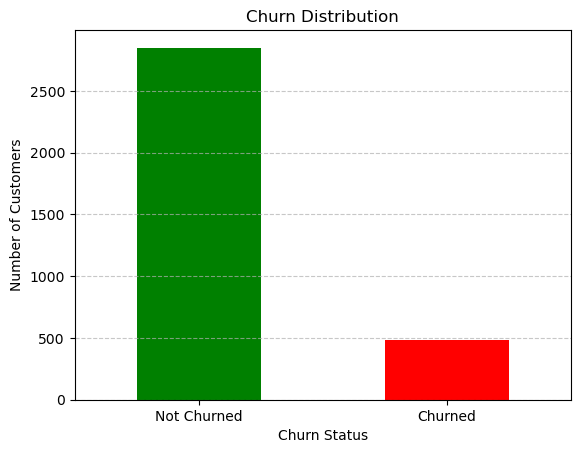

In [16]:
# plot the count from the result above
churn_counts = data['Churn'].value_counts().rename(index={0: 'Not Churned', 1: 'Churned'})
churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution')
plt.ylabel('Number of Customers')
plt.xlabel('Churn Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [18]:
# what is the proportion of churned users in the dataframe
churn_proportion = data['Churn'].mean()
print(f"Proportion of churned users: {churn_proportion:.4f} ({churn_proportion*100:.2f}%)")

Proportion of churned users: 0.1449 (14.49%)


In [19]:
# give the values of the first five rows in the first three columns
print(data.iloc[:5, :3])

  State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415


In [20]:
# give the values of the first five rows in the first three columns
values = data.iloc[:5, :3].values
print(values)

[['KS' 128 415]
 ['OH' 107 415]
 ['NJ' 137 415]
 ['OH' 84 408]
 ['OK' 75 415]]


In [21]:
# select all the states that starts with W
states_with_w = data[data['State'].str.startswith('W')]
print(states_with_w)

     State  Account length  Area code International plan Voice mail plan  \
9       WV             141        415                Yes             Yes   
26      WY              57        408                 No             Yes   
44      WI              64        510                 No              No   
49      WY              97        415                 No             Yes   
54      WY              87        415                 No              No   
...    ...             ...        ...                ...             ...   
3278    WI              87        415                 No              No   
3303    WI             114        415                 No             Yes   
3319    WY              89        415                 No              No   
3324    WV             159        415                 No              No   
3329    WV              68        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
9                   

In [22]:
# using the map function, replace Yes and No in the International plan column to True and False
data['International plan'] = data['International plan'].map({'Yes': True, 'No': False})

print(data[['International plan']].head())


   International plan
0               False
1               False
2               False
3                True
4                True


In [23]:
# we want to understand the total calls that have been made by customers. Total_calls is calculated as
# the sum of Total dat calls, Total eve calls, Total night calls, Total intl calls.
data['Total_calls'] = (
    data['Total day calls'] +
    data['Total eve calls'] +
    data['Total night calls'] +
    data['Total intl calls']
)

print(data[['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls', 'Total_calls']].head())


   Total day calls  Total eve calls  Total night calls  Total intl calls  \
0              110               99                 91                 3   
1              123              103                103                 3   
2              114              110                104                 5   
3               71               88                 89                 7   
4              113              122                121                 3   

   Total_calls  
0          303  
1          332  
2          333  
3          255  
4          359  


<function matplotlib.pyplot.show(close=None, block=None)>

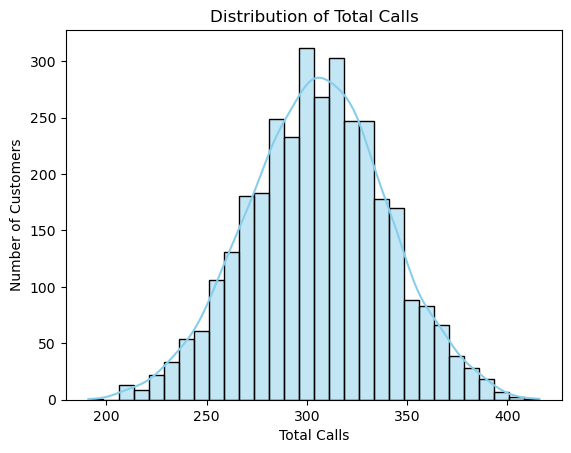

In [24]:
# seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Total_calls'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Calls')
plt.xlabel('Total Calls')
plt.ylabel('Number of Customers')
plt.show

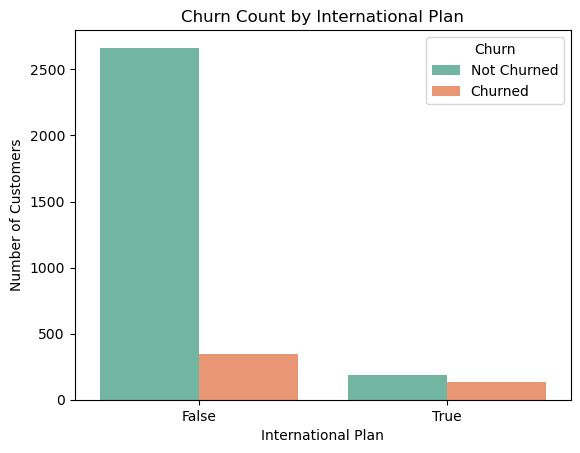

In [25]:
# create a count plot to understand the churn of the international plan
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='International plan', hue='Churn', data=data, palette='Set2')

plt.title('Churn Count by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


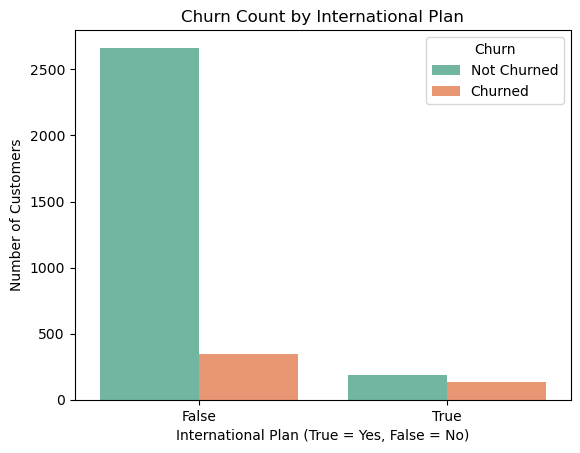

In [35]:
# Assuming your dataframe is named 'df' and the column containing the international plan information is named 'international_plan'
df = data
df.rename(columns={'International plan': 'international_plan'}, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='international_plan', hue='Churn', data=df, palette='Set2')

plt.title('Churn Count by International Plan')
plt.xlabel('International Plan (True = Yes, False = No)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()
